Original Data Set: 2012_Workplace_Fatal....
State Population Src: https://github.com/jakevdp/data-USstates/blob/master/state-population.csv
State Abbrevation Src: https://github.com/jasonong/List-of-US-States/blob/master/states.csv

The below normalizes the datasets together ito the data/merged_state_pop_workplace.csv

"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program,state_name,location,ages,year,population,Abbreviation


In [302]:
import pandas as pd

fatality_df = pd.read_csv('data/2012_Workplace_Fatalities_by_State (1).csv')
fatality_df = fatality_df[fatality_df['State or Federal Program'].notnull()]
fatality_df[['state_name','location']] = fatality_df['State'].str.split("\n", expand=True)

#fatality_df[['state_name','location']] = state_loc_split

osha_2012_df = pd.read_csv('data/FatalitiesFY12.csv')

state_pop_df = pd.read_csv('data/state_pop.csv')
state_abb_full_df = pd.read_csv('data/state_abbrev_full.csv')

#state_loc_split.head()
#fatality_df.head(10)

#Filter To Just The Year 2012
state_pop_df_year_2012 = state_pop_df[state_pop_df['year'].eq(2012)]

#Get Under 18 Populations
state_pop_df_year_2012_under = state_pop_df_year_2012[state_pop_df_year_2012['ages'].str.contains('under18')]

#Filter Out To Under Working Age Populations Dataset
state_pop_df_year_2012 = state_pop_df_year_2012[state_pop_df_year_2012['ages'].str.contains('total')]









state_pop_merge = pd.merge(state_pop_df_year_2012, state_abb_full_df, left_on='state/region', right_on='Abbreviation', how='inner').drop(columns=['state/region'])
state_pop_merge = pd.merge(fatality_df,state_pop_merge, left_on='state_name', right_on='State').drop(columns=['State_x','State_y'])


#state_pop_merge = pd.merge(state_pop_merge, state_abb_full_df, left_on='state/region', right_on='Abbreviation', how='inner').drop(columns=['state/region'])
#state_pop_merge = pd.merge(fatality_df,state_pop_merge, left_on='state_name', right_on='State').drop(columns=['State_x','State_y'])

state_pop_merge['fatality_to_population'] = state_pop_merge['Number of Fatalities, 2012'] / state_pop_merge['population']
state_pop_merge['injury_to_population'] = state_pop_merge['Number of Injuries/Illnesses 2012'] / state_pop_merge['population']
state_pop_merge['inspectors_to_population'] = state_pop_merge['Inspectors'] / state_pop_merge['population']

state_pop_merge['fatality_to_population_p_mm'] = state_pop_merge['fatality_to_population'] * 1000000
state_pop_merge['injury_to_population_p_mm'] = state_pop_merge['injury_to_population'] * 1000000
state_pop_merge['inspectors_to_population_p_mm'] = state_pop_merge['inspectors_to_population'] * 1000000

#Trying to Add the CHild Population
state_pop_merge = pd.merge(state_pop_merge, state_pop_df_year_2012_under[['state/region', 'population']],left_on='Abbreviation', right_on='state/region', how='left')
state_pop_merge['population'] = state_pop_merge['population_x']
state_pop_merge['total_underage_pop'] = state_pop_merge['population_y']
state_pop_merge['total_working_pop'] = state_pop_merge['population'] - state_pop_merge['total_underage_pop']
state_pop_merge = state_pop_merge.drop(columns=['population_x','population_y'])


state_pop_merge['fatality_to_working_population'] = state_pop_merge['Number of Fatalities, 2012'] / state_pop_merge['total_working_pop']
state_pop_merge['injury_to_working_population'] = state_pop_merge['Number of Injuries/Illnesses 2012'] / state_pop_merge['total_working_pop']
state_pop_merge['inspectors_to_working_population'] = state_pop_merge['Inspectors'] / state_pop_merge['total_working_pop']

state_pop_merge['fatality_to_working_population_p_mm'] = state_pop_merge['fatality_to_working_population'] * 1000000
state_pop_merge['injury_to_working_population_p_mm'] = state_pop_merge['injury_to_working_population'] * 1000000
state_pop_merge['inspectors_to_working_population_p_mm'] = state_pop_merge['inspectors_to_working_population'] * 1000000


#state_pop_merge.to_csv('data/merged_state_pop_workplace.csv', index=False)

#state_pop_merge.groupby(by=['state_name', "ages"]).sum()
state_pop_merge.head(102)
#state_abb_full_df.head(51)
#osha_2012_df.head(10)

,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program,...,state/region,population,total_underage_pop,total_working_pop,fatality_to_working_population,injury_to_working_population,inspectors_to_working_population,fatality_to_working_population_p_mm,injury_to_working_population_p_mm,inspectors_to_working_population_p_mm
0,63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State,...,SC,4723417.0,1077455.0,3645962.0,0.000017,0.009929,0.000007,17.279390,9928.792456,6.582625
1,49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,Federal,...,WV,1856680.0,384030.0,1472650.0,0.000033,0.013445,0.000005,33.273351,13445.149900,4.753336
2,44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,Federal,...,MA,6645303.0,1399417.0,5245886.0,0.000008,0.013287,0.000006,8.387525,13286.602111,6.290644
3,101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State,...,TN,6454914.0,1492689.0,4962225.0,0.000020,0.013119,0.000006,20.353773,13119.114913,6.045675
4,97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,Federal,...,OK,3815780.0,939911.0,2875869.0,0.000034,0.013561,0.000007,33.728935,13561.118396,6.606699
5,146.0,2.5,10.0,124900.0,3.2,1876.0,23.0,74.0,137.0,Federal,...,IL,12868192.0,3057042.0,9811150.0,0.000015,0.012730,0.000008,14.881028,12730.413866,7.542439
6,48.0,5.2,38.0,24300.0,3.9,2565.0,5.0,9.0,128.0,Federal,...,NE,1855350.0,462673.0,1392677.0,0.000034,0.017448,0.000006,34.465996,17448.410507,6.462374
7,14.0,3.1,18.0,7900.0,2.8,2406.0,6.0,5.0,175.0,Federal,...,DE,917053.0,204586.0,712467.0,0.000020,0.011088,0.000007,19.650033,11088.232859,7.017869
8,20.0,3.4,22.0,13700.0,3.8,964.0,39.0,20.0,79.0,State,...,HI,1390090.0,305981.0,1084109.0,0.000018,0.012637,0.000018,18.448329,12637.105678,18.448329
9,97.0,6.6,44.0,45600.0,4.5,790.0,43.0,26.0,98.0,State,...,IA,3075039.0,723917.0,2351122.0,0.000041,0.019395,0.000011,41.256898,19394.995241,11.058550


Show The Top 10 Federal and State By Fatality Rate

In [267]:
ascending_Fatalities = state_pop_merge.sort_values(by=['Number of Fatalities, 2012'],  ascending=False)

ascending_Fatalities['State or Federal Program'].eq('State').sum()
state_fat_total
#.groupby(by='State or Federal Program').sum()

#state_pop_merge.groupby(by=["State or Federal Program"])
#grouped_by_program.sort_values(by='Rate of Fatalities, 2012', ascending=False)

42

In [114]:
filter_2012 = osha_2012_df['Date of Incident'].str.contains("/2012")

In [181]:
state_fatality_filter = fatality_df['State or Federal Program'].str.contains("State")
fatality_df[state_fatality_filter].sort_values(by='Rate of Fatalities, 2012', ascending=False)
#fatality_df[state_filtered_Desc]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program,state_name,location
35,"Wyoming\n(43.23554147100049, -108.10982744299969)",35.0,12.2,49.0,6500.0,3.5,1777.0,28.0,9.0,101.0,State,Wyoming,"(43.23554147100049, -108.10982744299969)"
45,"Alaska\n(64.84507923900048, -147.72205669099972)",31.0,8.9,48.0,9700.0,4.6,889.0,41.0,11.0,58.0,State,Alaska,"(64.84507923900048, -147.72205669099972)"
9,"Iowa\n(42.469404401000475, -93.81648936699969)",97.0,6.6,44.0,45600.0,4.5,790.0,43.0,26.0,98.0,State,Iowa,"(42.469404401000475, -93.81648936699969)"
28,"Kentucky\n(37.645973909000475, -84.77496612599...",91.0,4.9,37.0,48900.0,4.1,3254.0,2.0,39.0,124.0,State,Kentucky,"(37.645973909000475, -84.77496612599964)"
18,"New Mexico\n(34.52088247800049, -106.240577688...",39.0,4.8,35.0,19900.0,3.9,998.0,37.0,9.0,191.0,State,New Mexico,"(34.52088247800049, -106.24057768899968)"
15,"Indiana\n(39.76691364600049, -86.14995579899966)",115.0,4.2,33.0,77900.0,3.9,1054.0,34.0,39.0,104.0,State,Indiana,"(39.76691364600049, -86.14995579899966)"
12,"Virginia\n(37.54268075100049, -78.45788924199968)",149.0,3.8,30.0,66200.0,2.7,726.0,46.0,48.0,82.0,State,Virginia,"(37.54268075100049, -78.45788924199968)"
3,"Tennessee\n(35.680943063000484, -85.7744864219...",101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State,Tennessee,"(35.680943063000484, -85.77448642199965)"
27,"Nevada\n(39.49324126500045, -117.07183978499972)",42.0,3.6,29.0,32400.0,4.1,2133.0,13.0,44.0,49.0,State,Nevada,"(39.49324126500045, -117.07183978499972)"
0,"South Carolina\n(33.99882060100049, -81.045367...",63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State,South Carolina,"(33.99882060100049, -81.04536765699964)"


In [115]:
osha_2012_df[filter_2012].head()
osha_2012_df["description"] = osha_2012_df['Unnamed: 4'].str.lower().str.replace('[^\w\s]','')

new_df = osha_2012_df[filter_2012]['description'].str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
new_df.head(50)

,Word,Frequency
0,a,891
1,worker,761
2,was,521
3,the,393
4,died,287
5,after,274
6,and,270
7,when,229
8,killed,221
9,from,214


In [119]:
filter_2012_crushed = osha_2012_df['description'].str.contains("crushed")
#ca_filter_2012 = osha_2012_df['Preliminary Description of Incident'].str.contains(" CA")
osha_2012_df[filter_2012_crushed][ca_filter_2012]#[filter_2012_crushed]

,Fiscal Year,Summary Report Date,Date of Incident,Preliminary Description of Incident,Unnamed: 4,description
41,FY 2012,10/15/2011,9/26/2011,"Kenai Drilling Limited, Ventura, CA, 93001",Worker was crushed by a piece of drill equipme...,worker was crushed by a piece of drill equipme...
63,FY 2012,10/15/2011,10/13/2011,"General Mills, Inc., Lodi, CA, 95242",Worker attempting to stop a moving railcar was...,worker attempting to stop a moving railcar was...
379,FY 2012,2/4/2012,1/26/2012,"Juan Esparza Ruiz, Trinidad, CA 95570",Worker walking down cut-tree-logs fell between...,worker walking down cuttreelogs fell between t...
876,FY 2012,7/28/2012,7/23/2012,"Sierra Pacific Industries, Sonora, CA 95370",Worker at a lumber mill was crushed in a machine.,worker at a lumber mill was crushed in a machine
901,FY 2012,8/4/2012,7/30/2012,"Bimbo Bakery, Galt, CA 95632",Worker was crushed by a rack of baked goods.,worker was crushed by a rack of baked goods
973,FY 2012,8/25/2012,8/22/2012,"David Girard Vineyard, Placerville, CA 95667",Worker at a vineyard was crushed in a wine press.,worker at a vineyard was crushed in a wine press


In [117]:
fatality_df.head()

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
0,"South Carolina\n(33.99882060100049, -81.045367...",63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State
1,"West Virginia\n(38.665511497000466, -80.712639...",49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,Federal
2,"Massachusetts\n(42.27687306500047, -72.0826898...",44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,Federal
3,"Tennessee\n(35.680943063000484, -85.7744864219...",101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State
4,"Oklahoma\n(35.472034350000456, -97.52106845499...",97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,Federal


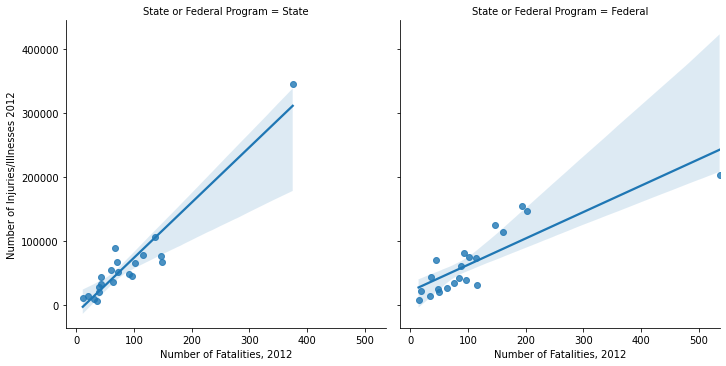

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
#fatality_df.plot.scatter(x="Number of Fatalities, 2012", y="Number of Injuries/Illnesses 2012", label="State")
sns.lmplot(x="Number of Fatalities, 2012", y="Number of Injuries/Illnesses 2012", col="State or Federal Program",data=fatality_df)
#f, ax = plt.subplots(figsize=(5, 6))
#sns.scatterplot(data=fatality_df, x="Number of Fatalities, 2012", y="Number of Injuries/Illnesses 2012", hue="State or Federal Program")
#sns.jointplot(x="Number of Fatalities, 2012", y="Number of Injuries/Illnesses 2012", kind="reg",data=fatality_df, ax=ax)

#fatality_df[state_filtered]
#sns.regplot(x="Number of Fatalities, 2012", y="Number of Injuries/Illnesses 2012",  data=fatality_df[state_filtered])

Fatalities to Working Population

<AxesSubplot:xlabel='Number of Fatalities, 2012', ylabel='population'>

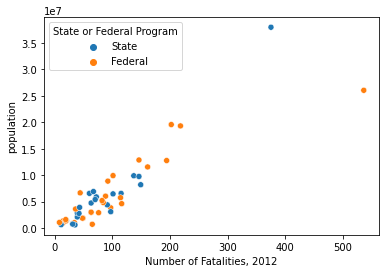

In [300]:
#sns.scatterplot(data=state_pop_merge, x="Number of Fatalities, 2012", y="total_working_pop", hue="State or Federal Program")
sns.scatterplot(data=state_pop_merge, x="Number of Fatalities, 2012", y="population", hue="State or Federal Program")

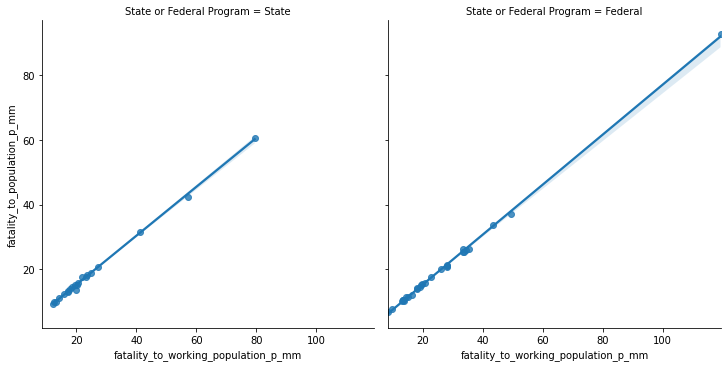

In [303]:
#Highest Rate Of Fatalities
sns.lmplot(x="fatality_to_working_population_p_mm", y="fatality_to_population_p_mm", col="State or Federal Program",data=state_pop_merge)

In [334]:
#State Rank Fatalities To Pop
#sns.scatterplot(data=state_pop_merge, x="State Rank, Fatalities 2012", y="fatality_to_population_p_mm", hue="State or Federal Program")

#State Rank Fatalities to Work Pop
#sns.scatterplot(data=state_pop_merge, x="State Rank, Fatalities 2012", y="fatality_to_working_population_p_mm", hue="State or Federal Program")

#State Rank Vs Fatalities Per Millions Working Pop
#sns.scatterplot(data=state_pop_merge, x="State Rank, Fatalities 2012", y="fat_r_working_pop", hue="same")




#state_pop_merge[['State Rank, Fatalities 2012','state/region','Rate of Fatalities, 2012', 'State or Federal Program', 'fatality_to_working_population_p_mm', 'fatality_to_population_p_mm']].sort_values(by='State Rank, Fatalities 2012').head(10)

#Calculate Actual Rank and Whether They Are The Same
state_pop_merge['fat_r_working_pop'] = state_pop_merge['fatality_to_working_population_p_mm'].rank(ascending = True)
state_pop_merge['rank_diff'] = state_pop_merge['fat_r_working_pop'] - state_pop_merge['State Rank, Fatalities 2012']

state_pop_merge['same'] = state_pop_merge['fat_r_working_pop'] == state_pop_merge['State Rank, Fatalities 2012']


#sns.scatterplot(data=state_pop_merge, x="State Rank, Fatalities 2012", y="rank_diff", hue="same")
#List Ordered By Fatalities Lowest to Highest
#state_pop_merge[['State Rank, Fatalities 2012','fat_r_working_pop','same','state/region','Rate of Fatalities, 2012', 'State or Federal Program', 'fatality_to_working_population_p_mm', 'fatality_to_population_p_mm']].sort_values(by='State Rank, Fatalities 2012').head(10)

#List Ordered By State Rank Lowest to Highest
state_pop_merge[['State Rank, Fatalities 2012','fat_r_working_pop','rank_diff','same','state/region','Rate of Fatalities, 2012', 'State or Federal Program', 'fatality_to_working_population_p_mm', 'fatality_to_population_p_mm']].sort_values(by='fatality_to_working_population_p_mm', ascending=True).head(10)


,"State Rank, Fatalities 2012",fat_r_working_pop,rank_diff,same,state/region,"Rate of Fatalities, 2012",State or Federal Program,fatality_to_working_population_p_mm,fatality_to_population_p_mm
2,1.0,1.0,0.0,True,MA,1.4,Federal,8.387525,6.621218
44,2.0,2.0,0.0,True,RI,1.7,Federal,9.595628,7.616842
10,6.0,3.0,-3.0,False,AZ,2.3,State,12.160519,9.158699
39,4.0,4.0,0.0,True,WA,2.2,State,12.625152,9.716738
31,3.0,5.0,2.0,False,CT,2.1,Federal,12.871826,10.022927
49,6.0,6.0,0.0,True,CA,2.3,State,13.024962,9.868453
21,8.0,7.0,-1.0,False,NY,2.4,Federal,13.192758,10.318692
17,4.0,8.0,4.0,False,NH,2.2,Federal,13.386894,10.593084
46,8.0,9.0,1.0,False,NJ,2.4,Federal,13.464775,10.374673
43,10.0,10.0,0.0,True,GA,2.5,Federal,13.597538,10.185922
